In [1]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dados <- read.csv2("Dados das ligas nacionais.csv", fileEncoding = "latin1", check.names = FALSE)

In [3]:
glimpse(dados)

Rows: 4,336
Columns: 5
$ Time_da_casa                          <chr> "Austria Klagenfurt", "Austria K…
$ Gols_feitos_pelo_time_da_casa         <int> 0, 3, 4, 2, 1, 1, 0, 2, 0, 0, 2,…
$ Gols_feitos_pelo_time_de_fora_de_casa <int> 1, 1, 2, 2, 2, 1, 0, 2, 2, 3, 1,…
$ Time_de_fora_de_casa                  <chr> "Austria Wien", "Blau-Weiss Linz…
$ Liga                                  <chr> "Austrian Bundesliga", "Austrian…


In [4]:
summary(dados)

 Time_da_casa       Gols_feitos_pelo_time_da_casa
 Length:4336        Min.   :0.000                
 Class :character   1st Qu.:0.000                
 Mode  :character   Median :1.000                
                    Mean   :1.428                
                    3rd Qu.:2.000                
                    Max.   :9.000                
 Gols_feitos_pelo_time_de_fora_de_casa Time_de_fora_de_casa     Liga          
 Min.   :0.0                           Length:4336          Length:4336       
 1st Qu.:0.0                           Class :character     Class :character  
 Median :1.0                           Mode  :character     Mode  :character  
 Mean   :1.2                                                                  
 3rd Qu.:2.0                                                                  
 Max.   :9.0                                                                  

In [5]:
dados |>
  group_by(Liga) |>
  summarise(
    Jogos = n(),
    Times = length(unique(Time_da_casa)),
    Gols_feitos = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )

Liga,Jogos,Times,Gols_feitos,Gols_sofridos
<chr>,<int>,<int>,<int>,<int>
Argentine Primera División,210,30,250,165
Austrian Bundesliga,132,12,213,156
Brasileirão,116,20,160,100
Bundesliga,306,18,499,460
Egyptian Premier League,153,18,166,149
English Premier League,380,20,575,540
J1 League,209,20,261,223
K League 1,121,12,140,138
La Liga,380,20,552,443


In [6]:
dados |>
  group_by(Liga) |>
  summarise(
    Jogos = n(),
    Times = length(unique(Time_da_casa)),
    Gols_feitos_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa),
    Gols_feitos_total = sum(Gols_feitos_pelo_time_da_casa) + sum(Gols_feitos_pelo_time_de_fora_de_casa),
    Media_de_gols_por_partida = (sum(Gols_feitos_pelo_time_da_casa) + sum(Gols_feitos_pelo_time_de_fora_de_casa)) / n()
  )

Liga,Jogos,Times,Gols_feitos_casa,Gols_sofridos_casa,Gols_feitos_total,Media_de_gols_por_partida
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
Argentine Primera División,210,30,250,165,415,1.976190
Austrian Bundesliga,132,12,213,156,369,2.795455
Brasileirão,116,20,160,100,260,2.241379
Bundesliga,306,18,499,460,959,3.133987
Egyptian Premier League,153,18,166,149,315,2.058824
English Premier League,380,20,575,540,1115,2.934211
J1 League,209,20,261,223,484,2.315789
K League 1,121,12,140,138,278,2.297521
La Liga,380,20,552,443,995,2.618421


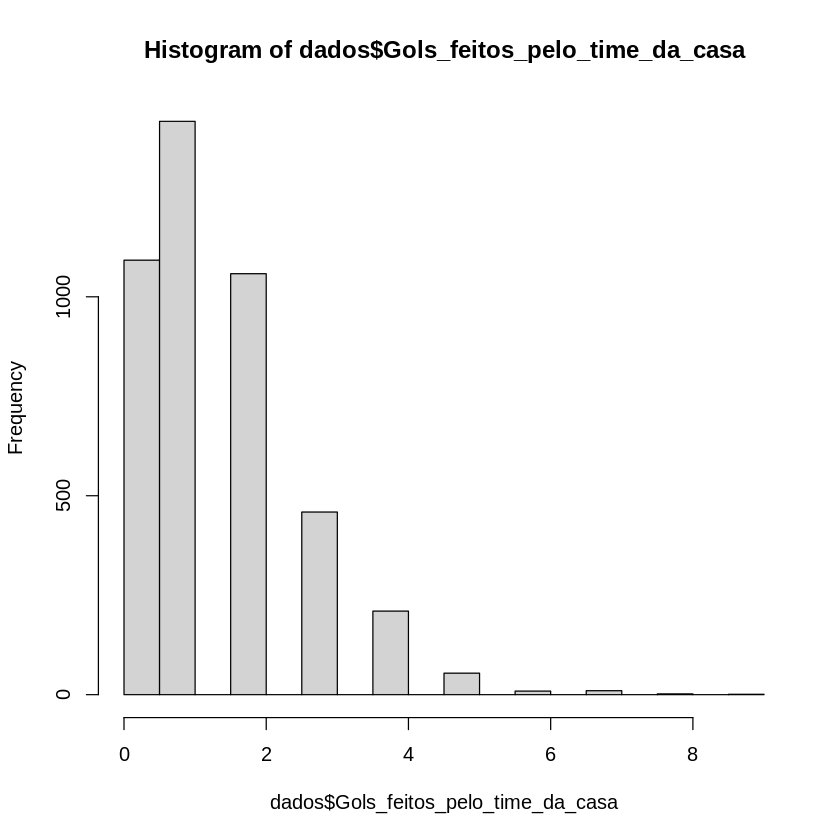

In [7]:
hist(dados$Gols_feitos_pelo_time_da_casa)

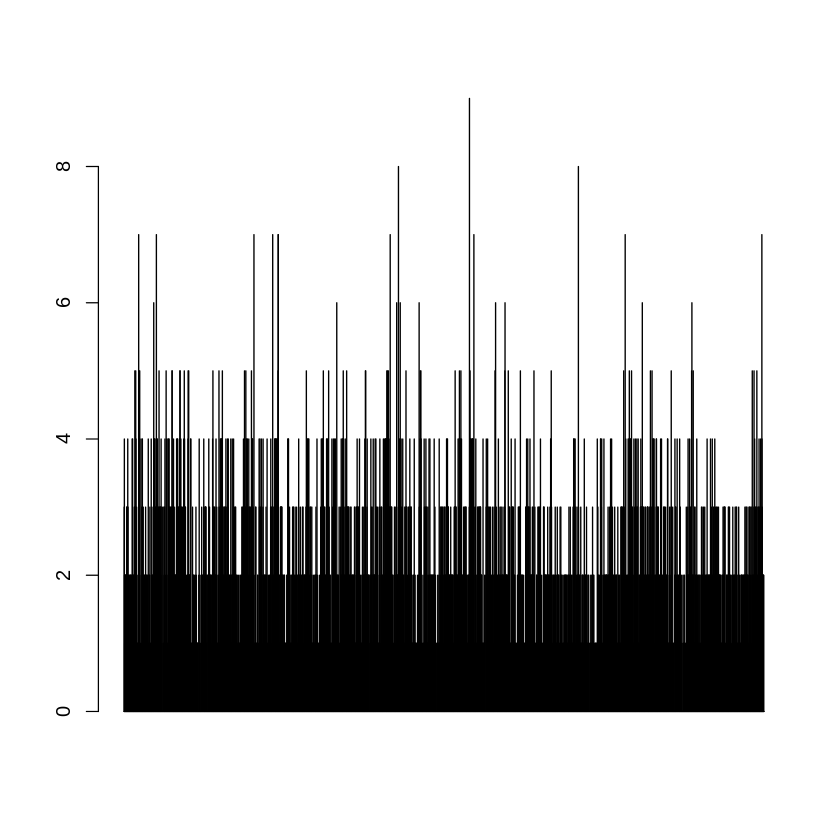

In [26]:
barplot(dados$Gols_feitos_pelo_time_da_casa)

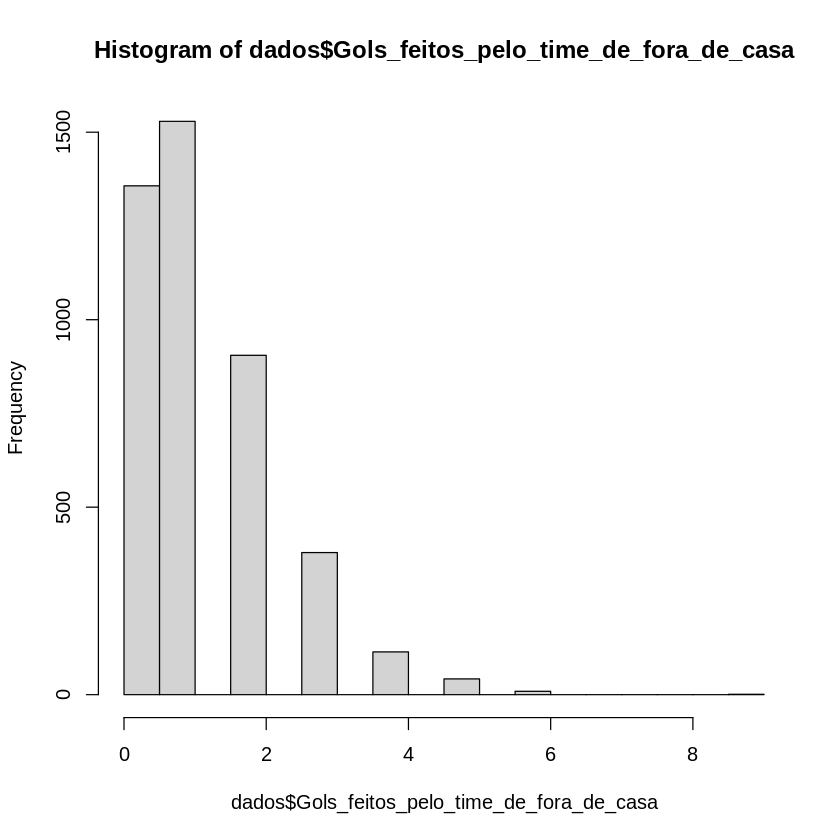

In [8]:
hist(dados$Gols_feitos_pelo_time_de_fora_de_casa)

In [9]:
dados |>
  group_by(Liga, Time_da_casa) |>
  summarise(
    Jogos = n(),
    Gols_feitos = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )

`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.


Liga,Time_da_casa,Jogos,Gols_feitos,Gols_sofridos
<chr>,<chr>,<int>,<int>,<int>
Argentine Primera División,Aldosivi,7,7,16
Argentine Primera División,Argentinos Juniors,7,13,4
Argentine Primera División,Atlético Tucuman,7,12,8
Argentine Primera División,Banfield,7,9,6
Argentine Primera División,Barracas Central,7,12,8
Argentine Primera División,Belgrano,7,8,9
Argentine Primera División,Boca Juniors,7,13,2
Argentine Primera División,Central Cordoba (SdE),7,10,8
Argentine Primera División,Defensa y Justicia,7,6,7


In [10]:
dados_de_times_em_casa <- dados |>
  group_by(Liga, Time_da_casa) |>
  summarise(
    Jogos_em_casa = n(),
    Gols_feitos_em_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_em_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )
dados_de_times_fora_de_casa <- dados |>
  group_by(Liga, Time_de_fora_de_casa) |>
  summarise(
    Jogos_fora_de_casa = n(),
    Gols_feitos_fora_de_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_fora_de_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )
dados_de_times <- dados_de_times_em_casa |>
  merge(
    dados_de_times_fora_de_casa,
    by.x = c("Time_da_casa", "Liga"),
    by.y = c("Time_de_fora_de_casa", "Liga")
  )
colnames(dados_de_times)[1] <- "Time"
dados_de_times


`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.


Time,Liga,Jogos_em_casa,Gols_feitos_em_casa,Gols_sofridos_em_casa,Jogos_fora_de_casa,Gols_feitos_fora_de_casa,Gols_sofridos_fora_de_casa
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1. FC Heidenheim,Bundesliga,17,13,33,17,31,24
AC Milan,Serie A,19,30,16,19,27,31
Ajman,UAE Pro League,13,29,22,13,24,11
Al Ahly,Egyptian Premier League,9,18,7,8,2,12
Al Ain,UAE Pro League,13,28,11,13,21,28
Al Bataeh,UAE Pro League,13,15,27,13,18,15
Al Ittihad,Egyptian Premier League,9,5,8,8,8,6
Al Jazira,UAE Pro League,13,20,17,13,23,25
Al Masry,Egyptian Premier League,8,8,5,9,6,11


In [11]:
dados_de_times$Jogos <- dados_de_times$Jogos_em_casa + dados_de_times$Jogos_fora_de_casa
dados_de_times$Gols_feitos <- dados_de_times$Gols_feitos_em_casa + dados_de_times$Gols_feitos_fora_de_casa
dados_de_times$Gols_sofridos <- dados_de_times$Gols_sofridos_em_casa + dados_de_times$Gols_sofridos_fora_de_casa
dados_de_times$Gols_feitos_por_jogo <- dados_de_times$Gols_feitos / dados_de_times$Jogos
dados_de_times$Gols_sofridos_por_jogo <- dados_de_times$Gols_sofridos / dados_de_times$Jogos
dados_de_times

Time,Liga,Jogos_em_casa,Gols_feitos_em_casa,Gols_sofridos_em_casa,Jogos_fora_de_casa,Gols_feitos_fora_de_casa,Gols_sofridos_fora_de_casa,Jogos,Gols_feitos,Gols_sofridos,Gols_feitos_por_jogo,Gols_sofridos_por_jogo
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1. FC Heidenheim,Bundesliga,17,13,33,17,31,24,34,44,57,1.2941176,1.6764706
AC Milan,Serie A,19,30,16,19,27,31,38,57,47,1.5000000,1.2368421
Ajman,UAE Pro League,13,29,22,13,24,11,26,53,33,2.0384615,1.2692308
Al Ahly,Egyptian Premier League,9,18,7,8,2,12,17,20,19,1.1764706,1.1176471
Al Ain,UAE Pro League,13,28,11,13,21,28,26,49,39,1.8846154,1.5000000
Al Bataeh,UAE Pro League,13,15,27,13,18,15,26,33,42,1.2692308,1.6153846
Al Ittihad,Egyptian Premier League,9,5,8,8,8,6,17,13,14,0.7647059,0.8235294
Al Jazira,UAE Pro League,13,20,17,13,23,25,26,43,42,1.6538462,1.6153846
Al Masry,Egyptian Premier League,8,8,5,9,6,11,17,14,16,0.8235294,0.9411765


In [12]:
dados_de_times$Time[order(dados_de_times$Gols_feitos_por_jogo)]

[1] "San Lorenzo"              "San Martin (SJ)"         
  [3] "Deportivo Riestra"        "Talleres (C)"            
  [5] "Palmeiras"                "Al Ittihad"              
  [7] "Smouha"                   "Tigre"                   
  [9] "Al Masry"                 "SuperSport United"       
 [11] "FC Seoul"                 "Platense"                
 [13] "CS Sfaxien"               "Tala'ea El Gaish"        
 [15] "ZED"                      "Stellenbosch"            
 [17] "Gangwon FC"               "Sanfrecce Hiroshima"     
 [19] "Yokohama FC"              "Red Bull Bragantino"     
 [21] "Getafe"                   "East Coast Bays"         
 [23] "Lanus"                    "Olympique Béja"          
 [25] "Stade Tunisien"           "El Gouna"                
 [27] "Farense"                  "FC St. Pauli"            
 [29] "Ismaily"                  "Tokyo Verdy"             
 [31] "Polokwane City"           "Richards Bay"            
 [33] "Club Africain"            "ENPPI"                   
 [35] "Godoy Cruz"               "Kashiwa Reysol"          
 [37] "Machida Zelvia"           "Modern Sport"            
 [39] "River Plate"              "Royal AM"                
 [41] "Sao Paulo"                "Velez Sarsfield"         
 [43] "Western Springs"          "Étoile du Sahel"         
 [45] "Cape Town City"           "Magesi"                  
 [47] "Chippa United"            "Daejeon Hana Citizen"    
 [49] "Fagiano Okayama"          "Avispa Fukuoka"          
 [51] "Gwangju FC"               "Lecce"                   
 [53] "Al-Ettifaq"               "Boavista"                
 [55] "Lens"                     "National Bank of Egypt"  
 [57] "Santa Clara"              "AS Soliman"              
 [59] "Golden Arrows"            "Newell's Old Boys"       
 [61] "Sport"                    "Gimcheon Sangmu"         
 [63] "Jeonbuk Hyundai Motors"   "Kaizer Chiefs"           
 [65] "Angers"                   "Petrojet"                
 [67] "Pharco"                   "Empoli"                  
 [69] "Mallorca"                 "Rayo Vallecano"          
 [71] "US Ben Guerdane"          "WSG Tirol"               
 [73] "Gimnasia y Esgrima (LP)"  "Huracan"                 
 [75] "Rosario Central"          "Sarmiento (J)"           
 [77] "Yokohama F. Marinos"      "Reims"                   
 [79] "Shonan Bellmare"          "Vissel Kobe"             
 [81] "Torino"                   "Atletico Mineiro"        
 [83] "Santos"                   "Vitoria"                 
 [85] "Al Ahly"                  "Al-Okhdood"              
 [87] "Alaves"                   "Genoa"                   
 [89] "Hellas Verona"            "Jeju SK"                 
 [91] "AS Gabès"                 "Pohang Steelers"         
 [93] "US Monastir"              "Toulouse"                
 [95] "TS Galaxy"                "Napoli"                  
 [97] "Real Sociedad"            "Ulsan HD"                
 [99] "Aldosivi"                 "Independiente Rivadavia" 
[101] "Al-Fayha"                 "Al-Taawoun"              
[103] "Ghazl El Mahalla"         "Everton"                 
[105] "AmaZulu"                  "Bahia"                   
[107] "Cruzeiro"                 "FC Anyang"               
[109] "Athletic Bilbao"          "EGS Gafsa"               
[111] "Espérance de Tunis"       "Al Bataeh"               
[113] "Argentinos Juniors"       "Belgrano"                
[115] "FC Tokyo"                 "Union"                   
[117] "Urawa Red Diamonds"       "Atalanta"                
[119] "Crystal Palace"           "Manchester United"       
[121] "Sevilla"                  "1. FC Heidenheim"        
[123] "Braga"                    "Estrela da Amadora"      
[125] "Mazatlan"                 "ES Métlaoui"             
[127] "Sekhukhune United"        "Kashima Antlers"         
[129] "Le Havre"                 "Gremio"                  
[131] "Fulham"                   "Juventus"                
[133] "Monza"                    "Udinese"

In [13]:
dados_de_times$Time[order(dados_de_times$Gols_sofridos_por_jogo)]

[1] "Newell's Old Boys"        "Botafogo"                
  [3] "CA Bizertin"              "Godoy Cruz"              
  [5] "Lanus"                    "El Gouna"                
  [7] "US Monastir"              "Deportivo Riestra"       
  [9] "Gimnasia y Esgrima (LP)"  "Independiente"           
 [11] "Instituto"                "San Martin (SJ)"         
 [13] "Sarmiento (J)"            "Polokwane City"          
 [15] "Richards Bay"             "Fagiano Okayama"         
 [17] "Cape Town City"           "Union"                   
 [19] "AS Gabès"                 "Corinthians"             
 [21] "ES Métlaoui"              "Magesi"                  
 [23] "Banfield"                 "Estudiantes (LP)"        
 [25] "Platense"                 "Rosario Central"         
 [27] "San Lorenzo"              "Velez Sarsfield"         
 [29] "Ceara"                    "Flamengo"                
 [31] "Juventude"                "Stade Tunisien"          
 [33] "Atletico Mineiro"         "Chippa United"           
 [35] "Fortaleza"                "Haras El Hodoud"         
 [37] "ZED"                      "Club Africain"           
 [39] "Red Bull Salzburg"        "Boca Juniors"            
 [41] "Golden Arrows"            "Huracan"                 
 [43] "River Plate"              "Talleres (C)"            
 [45] "Mazatlan"                 "AS Soliman"              
 [47] "CS Sfaxien"               "Espérance de Zarzis"     
 [49] "Tokyo Verdy"              "Al Ittihad"              
 [51] "ENPPI"                    "SuperSport United"       
 [53] "Bahia"                    "Cruzeiro"                
 [55] "Internacional"            "Vitoria"                 
 [57] "Suwon FC"                 "Avispa Fukuoka"          
 [59] "Shonan Bellmare"          "Argentinos Juniors"      
 [61] "Atlético Tucuman"         "Belgrano"                
 [63] "Orlando Pirates"          "Rapid Wien"              
 [65] "Estrela da Amadora"       "Marumo Gallants"         
 [67] "Roma"                     "JS El Omrane"            
 [69] "Royal AM"                 "US Ben Guerdane"         
 [71] "Urawa Red Diamonds"       "Yokohama FC"             
 [73] "Guadalajara"              "UANL"                    
 [75] "Gremio"                   "Santos"                  
 [77] "Vasco da Gama"            "Athletic Bilbao"         
 [79] "Real Sociedad"            "Tigre"                   
 [81] "Olympique Béja"           "Al Masry"                
 [83] "Ismaily"                  "Modern Sport"            
 [85] "Petrojet"                 "Pyramids"                
 [87] "Santa Clara"              "Tala'ea El Gaish"        
 [89] "Mallorca"                 "Gamba Osaka"             
 [91] "Nagoya Grampus"           "Kashima Antlers"         
 [93] "EGS Gafsa"                "Espanyol"                
 [95] "Venezia"                  "Al-Fayha"                
 [97] "Austria Wien"             "Barracas Central"        
 [99] "Fluminense"               "Getafe"                  
[101] "Kaizer Chiefs"            "Mamelodi Sundowns"       
[103] "Osasuna"                  "Pharco"                  
[105] "Racing"                   "Sao Paulo"               
[107] "Sport"                    "TS Galaxy"               
[109] "Ulsan HD"                 "Valencia"                
[111] "Everton"                  "Al-Qadsiah"              
[113] "America"                  "Gil Vicente"             
[115] "Queretaro"                "US Tataouine"            
[117] "AmaZulu"                  "Blau-Weiss Linz"         
[119] "Rheindorf Altach"         "FC Seoul"                
[121] "Gwangju FC"               "Napoli"                  
[123] "Torino"                   "Casa Pia"                
[125] "Ceramica Cleopatra"       "Famalicao"               
[127] "Nacional"                 "Stellenbosch"            
[129] "Alaves"                   "Atletico Madrid"         
[131] "Genoa"                    "Al-Taawoun"              
[133] "Atletico San Luis"        "FC Augsb

In [14]:
dados_copa <- read.csv2("Resultados da Copa do Mundo.csv", fileEncoding = "latin1", check.names = FALSE)

In [15]:
glimpse(dados_copa)

Rows: 62
Columns: 4
$ Time_da_casa                          <chr> "Al Ahly", "Bayern Munich", "Par…
$ Gols_feitos_pelo_time_da_casa         <int> 0, 10, 4, 0, 2, 2, 2, 2, 0, 3, 0…
$ Gols_feitos_pelo_time_de_fora_de_casa <int> 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1,…
$ Time_de_fora_de_casa                  <chr> "Inter Miami CF", "Auckland City…


In [16]:
summary(dados_copa)

 Time_da_casa       Gols_feitos_pelo_time_da_casa
 Length:62          Min.   : 0.000               
 Class :character   1st Qu.: 0.250               
 Mode  :character   Median : 2.000               
                    Mean   : 1.806               
                    3rd Qu.: 2.000               
                    Max.   :10.000               
 Gols_feitos_pelo_time_de_fora_de_casa Time_de_fora_de_casa
 Min.   :0.00                          Length:62           
 1st Qu.:0.00                          Class :character    
 Median :1.00                          Mode  :character    
 Mean   :1.29                                              
 3rd Qu.:2.00                                              
 Max.   :5.00                                              

In [17]:
dados_opta <- read.csv2("Times e ligas.csv", fileEncoding = "latin1", check.names = FALSE)

In [18]:
glimpse(dados_opta)

Rows: 32
Columns: 3
$ Time           <chr> "Al Ahly", "Al Ain", "Al-Hilal", "Atletico Madrid", "Au…
$ Liga           <chr> "Egyptian Premier League", "UAE Pro League", "Saudi Pro…
$ Rating_da_liga <dbl> 72.9, 70.6, 78.8, 90.2, 48.4, 89.5, 81.7, 82.0, 82.0, 8…


In [19]:
summary(dados_opta)

     Time               Liga           Rating_da_liga 
 Length:32          Length:32          Min.   :48.40  
 Class :character   Class :character   1st Qu.:78.42  
 Mode  :character   Mode  :character   Median :81.70  
                                       Mean   :81.37  
                                       3rd Qu.:89.12  
                                       Max.   :95.70  

In [20]:
dados_combinados <- dados_de_times |>
  merge(
    dados_opta[-1],
    by = c("Liga"),
    all.x = T
  )

In [21]:
glimpse(dados_combinados)

Rows: 524
Columns: 14
$ Liga                       <chr> "Argentine Primera División", "Argentine Pr…
$ Time                       <chr> "Newell's Old Boys", "Newell's Old Boys", "…
$ Jogos_em_casa              <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7…
$ Gols_feitos_em_casa        <int> 5, 5, 8, 8, 15, 15, 9, 9, 8, 8, 2, 2, 5, 5,…
$ Gols_sofridos_em_casa      <int> 2, 2, 4, 4, 1, 1, 5, 5, 9, 9, 4, 4, 5, 5, 1…
$ Jogos_fora_de_casa         <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7…
$ Gols_feitos_fora_de_casa   <int> 10, 10, 5, 5, 10, 10, 7, 7, 10, 10, 12, 12,…
$ Gols_sofridos_fora_de_casa <int> 4, 4, 3, 3, 7, 7, 6, 6, 3, 3, 3, 3, 8, 8, 6…
$ Jogos                      <int> 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,…
$ Gols_feitos                <int> 15, 15, 13, 13, 25, 25, 16, 16, 18, 18, 14,…
$ Gols_sofridos              <int> 6, 6, 7, 7, 8, 8, 11, 11, 12, 12, 7, 7, 13,…
$ Gols_feitos_por_jogo       <dbl> 1.0714286, 1.0714286, 0.9285714, 0.9285714,…
$ Gols_sofridos_po

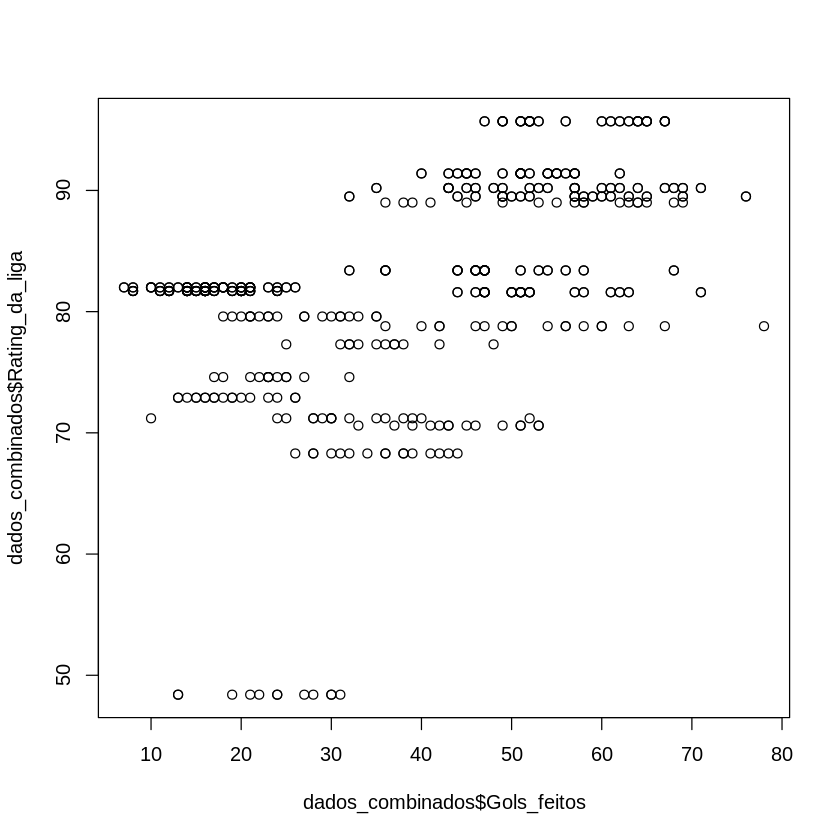

In [22]:
plot(
  x = dados_combinados$Gols_feitos,
  y = dados_combinados$Rating_da_liga
)

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


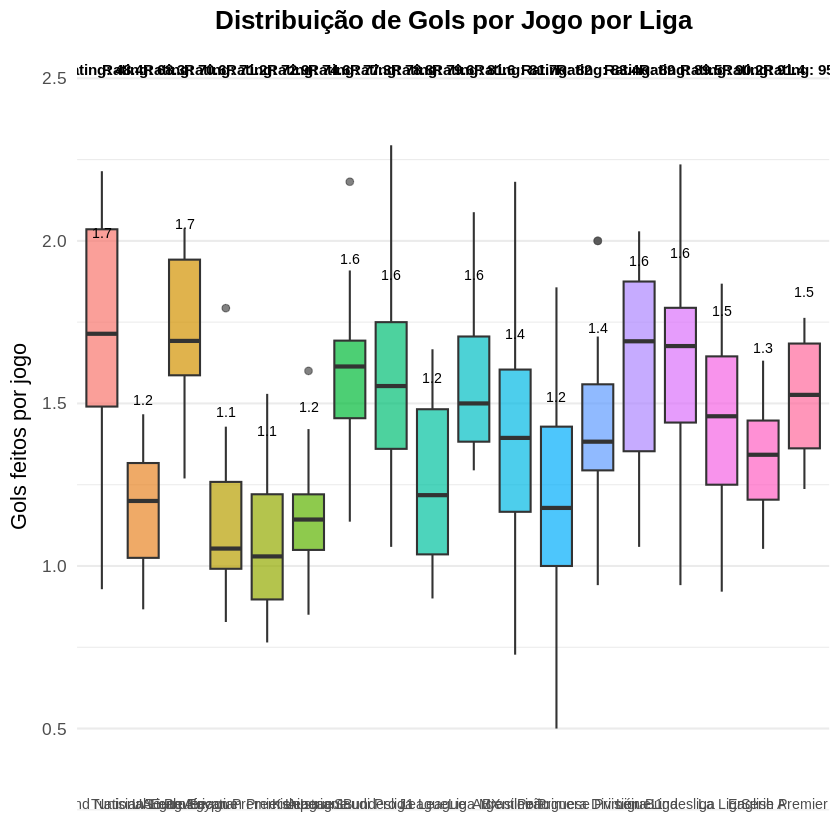

In [23]:
# Ordenar as ligas pelo rating
dados_plot <- dados_combinados |>
  mutate(Liga = reorder(Liga, Rating_da_liga))

# Criar o boxplot
ggplot(dados_plot, aes(x = Liga, y = Gols_feitos_por_jogo, fill = Liga)) +
  geom_boxplot(show.legend = FALSE, outlier.color = "gray30", alpha = 0.7) +

  # Rótulo superior: Rating_da_liga (média por liga)
  stat_summary(
    fun = mean,
    geom = "text",
    aes(label = round(..y.., 1)),
    position = position_nudge(y = 0.3),
    color = "black",
    size = 3,
    vjust = -0.5
  ) +

  # Adiciona rótulos personalizados com geom_text (em cima e embaixo)
  geom_text(
    data = dados_plot |> distinct(Liga, Rating_da_liga),
    aes(x = Liga, y = max(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) + 0.2,
        label = paste0("Rating: ", round(Rating_da_liga, 2))),
    size = 3.2,
    fontface = "bold",
    color = "black",
    vjust = -0.5
  ) +
  geom_text(
    data = dados_plot |> distinct(Liga),
    aes(x = Liga, y = min(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) - 0.2,
        label = Liga),
    size = 3,
    color = "gray30",
    vjust = 1.5
  ) +

  labs(
    title = "Distribuição de Gols por Jogo por Liga",
    y = "Gols feitos por jogo",
    x = NULL
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_blank(),    # remove texto padrão
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.major.x = element_blank()
  )


In [24]:
figura_boxplot <- ggplot(dados_plot, aes(x = Liga, y = Gols_feitos_por_jogo, fill = Liga)) +
  geom_boxplot(show.legend = FALSE, outlier.color = "gray30", alpha = 0.7) +

  # 🔹 Rótulo superior (Rating_da_liga) — à direita
  geom_text(
    data = distinct(dados_plot, Liga, Rating_da_liga),
    aes(
      x = Liga,
      y = max(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) + 0.05,
      label = paste0("Rating: ", round(Rating_da_liga, 2))
    ),
    size = 1.6,        # rating: metade do original
    fontface = "bold",
    color = "black",
    hjust = 0,
    vjust = 0.5
  ) +

  # 🔹 Rótulo inferior (Liga) — à esquerda
  geom_text(
    data = distinct(dados_plot, Liga),
    aes(
      x = Liga,
      y = min(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) - 0.05,
      label = Liga
    ),
    size = 0.75,       # 🔸 reduzido pela metade novamente
    color = "gray30",
    hjust = 1,
    vjust = 0.5
  ) +

  labs(
    title = "Distribuição de Gols por Jogo por Liga",
    x = NULL,
    y = "Gols feitos por jogo"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.y = element_blank(),
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.major.y = element_blank()
  ) +
  coord_flip()

# 💾 Salvar figura
ggsave(
  filename = "boxplot_gols_por_liga_horizontal.png",
  plot = figura_boxplot,
  width = 10, height = 6, dpi = 300
)
